1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

## K Nearest Neighbor(KNN) exercise.

### Loading Data

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("../data/iris.csv")
df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
# target
variety = df["variety"]

In [4]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le_variety = preprocessing.LabelEncoder()

In [5]:
# Converting string labels into numbers.
y = le_variety.fit_transform(variety)
# Setosa: 0, Versicolor: 1, Virginica:2
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
y = np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
le_variety.inverse_transform([0, 1, 2])

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [8]:
X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values   #"X" as numpy array


## Generating Model
Let's build **KNN classifier model**.

-First, import the KNeighborsClassifier module and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.

-Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

### (X_train=80%) (X_test=20%)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=45)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Testing K=3

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model_k3 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_k3.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'


KNeighborsClassifier(n_neighbors=3)

In [11]:

#Predict Output
predicted_k3= model_k3.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_k3)   #model prediction "Virginica"

[2]


In [12]:
#Predict Output
predicted_k3_1= model_k3.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_k3_1)   #model prediction "Virginica"

[2]


## Testing K=7

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model_k7 = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model_k7.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=7)

In [14]:
#Predict Output
predicted_k7= model_k7.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_k7)   #model prediction "Virginica" again, even with K =7

[2]


In [15]:
#Predict Output
predicted_k7_1= model_k7.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_k7_1)   #model prediction "Virginica" again, even with K= 7

[2]


## SCORES, model K=3  and model K = 7

In [16]:
print('SCORE Train - k=3 :' , model_k3.score(X_train, y_train))
print('SCORE Test  - k=3 :', model_k3.score(X_test, y_test))
print('SCORE Train - k=7 :', model_k7.score(X_train, y_train))
print('SCORE Test  - k=7 :', model_k7.score(X_test, y_test))

SCORE Train - k=3 : 0.9666666666666667
SCORE Test  - k=3 : 0.9666666666666667
SCORE Train - k=7 : 0.975
SCORE Test  - k=7 : 0.9666666666666667


## Visualizing the Score when K is in a range 1-20

In [17]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x3b909bc8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

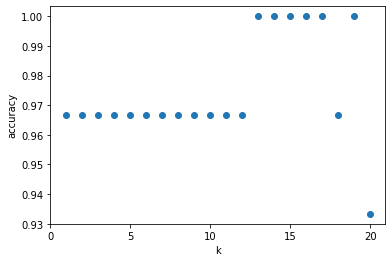

In [18]:
k_range = range(1, 21)
scores = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores.values()))
plt.xticks([0,5,10,15,20])

In [19]:
scores

{1: 0.9666666666666667,
 2: 0.9666666666666667,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 0.9666666666666667,
 19: 1.0,
 20: 0.9333333333333333}

## Re-generating Model for Test Validation = 60%

In [20]:

X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size= 0.6, random_state=45)
print(X_train_60.shape)
print(X_test_60.shape)
print(y_train_60.shape)
print(y_test_60.shape)

(60, 4)
(90, 4)
(60,)
(90,)


## Let's build KNN classifier model for k=3, Test Size = 60%.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model_k3_60 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_k3_60.fit(X_train_60, y_train_60)  # Memorize some trivial features between 'features' and 'label'


KNeighborsClassifier(n_neighbors=3)

In [22]:
#Predict Output
predicted_new_k3= model_k3_60.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_new_k3)   #model prediction "Virginica"

[2]


In [23]:
#Predict Output
predicted_new_k3_1= model_k3_60.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_new_k3_1)   #model prediction "Virginica"

[2]


## Let's build KNN classifier model for k=7, Test Size = 60%.

In [24]:
model_k7_60 = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model_k7_60.fit(X_train_60, y_train_60)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=7)

In [25]:
#Predict Output
predicted_new_k7= model_k7_60.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_new_k7)   #model prediction "Virginica"

[2]


In [47]:
#Predict Output
predicted_new_k7= model_k7_60.predict([[0,0,0,0]]) 
print(predicted_new_k7)   #model prediction "Virginica"

[0]


In [26]:
#Predict Output
predicted_new_k7_1= model_k7_60.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_new_k7_1)   #model prediction "Virginica"

[2]


## SCORES, model K=3 and model K = 7, test size = 60%

In [27]:
print('SCORE Train - k=3 :', model_k3_60.score(X_train_60, y_train_60))
print('SCORE Test  - k=3 :', model_k3_60.score(X_test_60, y_test_60))
print('SCORE Train - k=7 :', model_k7_60.score(X_train_60, y_train_60))
print('SCORE Test  - k=7 :', model_k7_60.score(X_test_60, y_test_60))


SCORE Train - k=3 : 0.9666666666666667
SCORE Test  - k=3 : 0.9777777777777777
SCORE Train - k=7 : 0.95
SCORE Test  - k=7 : 0.9888888888888889


## Visualizing the Score when K is in a range 1-20

([<matplotlib.axis.XTick at 0x3da5fb48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

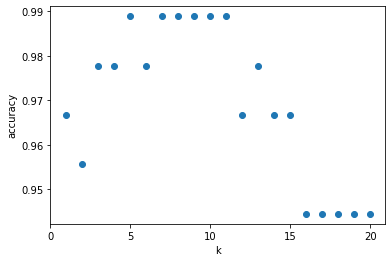

In [28]:
k_range = range(1, 21)
scores_60 = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_60, y_train_60)
    scores_60[k] = knn.score(X_test_60, y_test_60)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores_60.values()))
plt.xticks([0,5,10,15,20])

In [29]:
scores_60

{1: 0.9666666666666667,
 2: 0.9555555555555556,
 3: 0.9777777777777777,
 4: 0.9777777777777777,
 5: 0.9888888888888889,
 6: 0.9777777777777777,
 7: 0.9888888888888889,
 8: 0.9888888888888889,
 9: 0.9888888888888889,
 10: 0.9888888888888889,
 11: 0.9888888888888889,
 12: 0.9666666666666667,
 13: 0.9777777777777777,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9444444444444444,
 17: 0.9444444444444444,
 18: 0.9444444444444444,
 19: 0.9444444444444444,
 20: 0.9444444444444444}

## Conclusion, test size = 60

_ The results provided by the KNN model with the test set at 60% are about **3 percentage points lower** than the previous one; since having less training set the model is less accurate

## Re-generating Model removing "Setosa" class

In [30]:
#removing setosa class
df[df.variety == 'Setosa'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [31]:
new_df = df.drop(df[df.variety == 'Setosa'].index)
new_df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [32]:
# target not setosa
variety_not_setosa = new_df["variety"]

In [33]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le_variety_not_setosa = preprocessing.LabelEncoder()

In [34]:
# Converting string labels into numbers.
y = le_variety_not_setosa.fit_transform(variety_not_setosa)
# Versicolor: 0, Virginica:1
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
le_variety_not_setosa.inverse_transform([0, 1])

array(['Versicolor', 'Virginica'], dtype=object)

In [36]:
X = new_df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].values   #"X" as numpy array

## Generating New Model without Class "Setosa"
* Let's build KNN classifier model.

(X_train=80%) (X_test=20%)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=45)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


## Testing K=3

In [50]:
model_k3_not_setosa = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model_k3_not_setosa.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=3)

In [51]:
#Predict Output
predicted_k3_not_setosa= model_k3_not_setosa.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_k3_not_setosa)   #model prediction "Virginica"

[1]


In [40]:
#Predict Output
predicted_k3_1_not_setosa= model_k3_not_setosa.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_k3_1_not_setosa)   #model prediction "Virginica"

[1]


## Testing K=7

In [41]:
model_k7_not_setosa = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model_k7_not_setosa.fit(X_train, y_train)  # Memorize some trivial features between 'features' and 'label'

KNeighborsClassifier(n_neighbors=7)

In [42]:
#Predict Output
predicted_k7_not_setosa= model_k7_not_setosa.predict([[15.7,2.8,9.5,0.1]]) 
print(predicted_k7_not_setosa)   #model prediction "Virginica"

[1]


In [53]:
X_test[0]

array([7. , 3.2, 4.7, 1.4])

In [54]:
y_test[0]

0

In [57]:
predicted_k7_not_setosa= model_k7_not_setosa.predict(X_test[0].reshape(1,-1)) 
print(predicted_k7_not_setosa)   

[0]


In [43]:
predicted_k7_1_not_setosa= model_k7_not_setosa.predict([[1.7,3.8,4.5,11.3]]) 
print(predicted_k7_1_not_setosa)   #model prediction "Virginica"

[1]


## SCORES not Setosa, model K=3  and model K = 7

In [44]:
print('SCORE Train - k=3 :', model_k3_not_setosa.score(X_train, y_train))
print('SCORE Test  - k=3 :', model_k3_not_setosa.score(X_test, y_test))
print('SCORE Train - k=7 :', model_k7_not_setosa.score(X_train, y_train))
print('SCORE Test  - k=7 :', model_k7_not_setosa.score(X_test, y_test))

SCORE Train - k=3 : 0.9625
SCORE Test  - k=3 : 0.9
SCORE Train - k=7 : 0.9625
SCORE Test  - k=7 : 0.95


## Visualizing the Score not Setosa when K is in a range 1-20

([<matplotlib.axis.XTick at 0x3dad6448>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

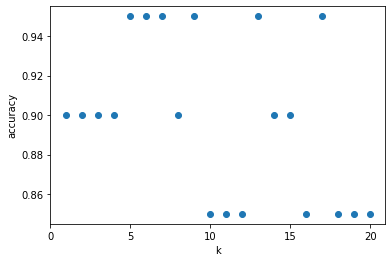

In [45]:
k_range = range(1, 21)
scores_not_setosa = {}
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_not_setosa[k] = knn.score(X_test, y_test)
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, list(scores_not_setosa.values()))
plt.xticks([0,5,10,15,20])

In [46]:
scores_not_setosa

{1: 0.9,
 2: 0.9,
 3: 0.9,
 4: 0.9,
 5: 0.95,
 6: 0.95,
 7: 0.95,
 8: 0.9,
 9: 0.95,
 10: 0.85,
 11: 0.85,
 12: 0.85,
 13: 0.95,
 14: 0.9,
 15: 0.9,
 16: 0.85,
 17: 0.95,
 18: 0.85,
 19: 0.85,
 20: 0.85}

## Conclusions:

+ Re-generating the model without "Setosa" class, the porcentual scores diferences with all model(setosa included) still being a good model for it, maybe cause another values of the dataset there are relevant too.

+ I think that this KNN prediction model, is  a good model for this dataset.